colab -> https://colab.research.google.com/drive/1stYYpeiyFmvuWqKYpXD1bCcFgWTtQLj0#scrollTo=VQynJQ_pr69A

Data Acquization -> Text Preprocess -> Feature Engineering

1. What is Feature Engineering [Text Extraction/ Text Representation] from text?
- Text extraction means finding and picking out useful parts from a big text.
-Text representation is about turning text into numbers or patterns that a computer can work with.

2. Why do we need it?
- We need text extraction and text representation in NLP because computers can’t understand text the way humans do. These techniques help us turn raw text into a format that computers can process and make sense of.

3. Why is it difficult?
- Images  to numbers is easy => bcz pixels is built from numbers
- Audio to number is easy -> based on there frequency

- text to number is diffcult

4. Technique:
- one hot encoding
- bag of words
- Ngrams
- Tf-Idf
- word2vec [Embeddings]
- Custom feature's

# 1. One Hot Encoding

One-Hot Encoding (Simple Explanation)
One-hot encoding is a way to convert words (or categories) into numbers that a computer can understand. Here's how it works:

List all the unique words/categories you have.
Give each word a unique position in a list.
Represent each word as a list of 0s, except for a 1 in its unique position.
Small Example:
For the words: ["apple", "banana", "cherry"]

"apple" becomes [1, 0, 0]
"banana" becomes [0, 1, 0]
"cherry" becomes [0, 0, 1]
The position of the 1 shows which word it represents.

#Flaws of One-Hot Encoding
- Sparsity:
The encoded lists can become very long if there are many unique words, but most of the list will be 0s. This wastes space and slows processing.

- No Fixed Size:
If you add new words to your data, the list size changes, so the encoding doesn't work well with new data unless updated.

- OOV (Out of Vocabulary):
If a word isn't in your original list, you can't represent it. For example, if "orange" wasn't in your list, the computer won't know what it is.

- No Capturing of Semantic Meaning:
One-hot encoding doesn't show relationships between words. For example, "apple" and "banana" are both fruits, but their encodings [1, 0, 0] and [0, 1, 0] don't reflect that.

This is why next techniques used Bag of words.








**In Summary:**
- One-hot encoding is specifically for categorical data not for sentences.


In [ ]:
# code

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Step 1: Create a dataset of categories (words)
data = ['apple', 'banana', 'cherry', 'apple']

# Step 2: Reshape data to fit the encoder's input format
data_reshaped = [[word] for word in data]

# Step 3: Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False to get a dense array

# Step 4: Fit and transform the data
one_hot = encoder.fit_transform(data_reshaped)

# Step 5: Display the results
encoded_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out())
print("One-Hot Encoded Data:")
print(encoded_df)

One-Hot Encoded Data:
   x0_apple  x0_banana  x0_cherry
0       1.0        0.0        0.0
1       0.0        1.0        0.0
2       0.0        0.0        1.0
3       1.0        0.0        0.0


# 2. Bag of words

The Bag of Words (BoW) method is a simple way to represent text data as numbers

**Intuition Behind BoW**
1. Does the Word Occur?
- BoW checks whether a word is present in a sentence or document. If a word occurs, we count it; otherwise, it gets a count of 0.

2. How Often Does the Word Occur?
- BoW also captures the frequency of words, which helps identify which words are more important in a particular sentence or document.

3. Simplifies Text:
- It turns text into numbers (vectors) so that we can apply mathematical models. However, it ignores grammar, meaning, and word order.

**Small Example with Intuition**

Example Sentences:

- "I love apples"

- "I love oranges"

**Step 1: Build Vocabulary**

Take all unique words from both sentences:
["I", "love", "apples", "oranges"].

Intuition:

These are all the possible "features" (words) that we will use to describe the sentences.

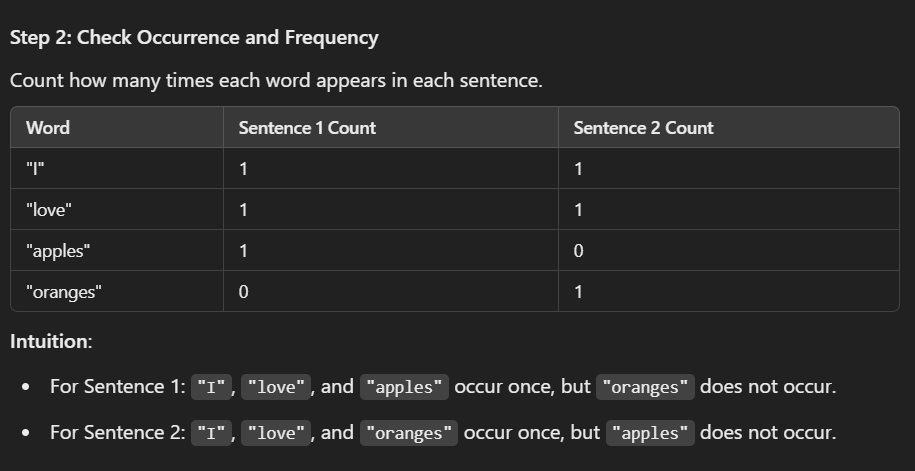

**Step 3: Represent as Vectors**

Turn each sentence into a numerical vector based on word occurrences and frequency:

Sentence 1: [1, 1, 1, 0]
Sentence 2: [1, 1, 0, 1]

In [ ]:
# Coding Example of Bag of Words

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
# createing a custom Dataframe
data = {
    'text': ['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write comment'],
    'output': [1,1,0,0]
}
df = pd.DataFrame(data)
df.head()

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [ ]:
# This function will collect the vocabulary [unique words]
bow = cv.fit_transform(df['text'])


In [ ]:
# vocabulary [unique words]
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}


In [ ]:
# To convert from sparse matrix to array we use toarray()
print(bow[0].toarray()) #people watch campusx
print(bow[1].toarray()) #campusx watch campusx

# The value is built by this order value
# {'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1}

[[1 0 1 1 0]]
[[2 0 0 1 0]]


In [ ]:
#custome Input
# The words [ of, and ] were not trained so it is not considered
# The value output => array([[2, 1, 0, 1, 1]]) is in this order => {'people': 2, 'watch': 3, 'campusx': 0, 'write': 4, 'comment': 1} of its dict value

cv.transform(['Campusx watch and write comment of Campusx ']).toarray()

array([[2, 1, 0, 1, 1]])

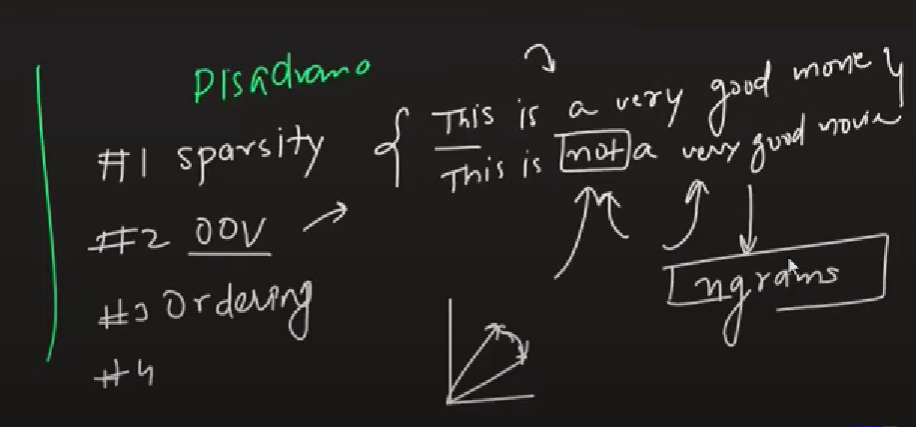

Ngram will over come the disadvantaeges of bag of words

# 3. Ngrams

Bag of words was not able to consider the sentence sequence order here the Ngrams will do

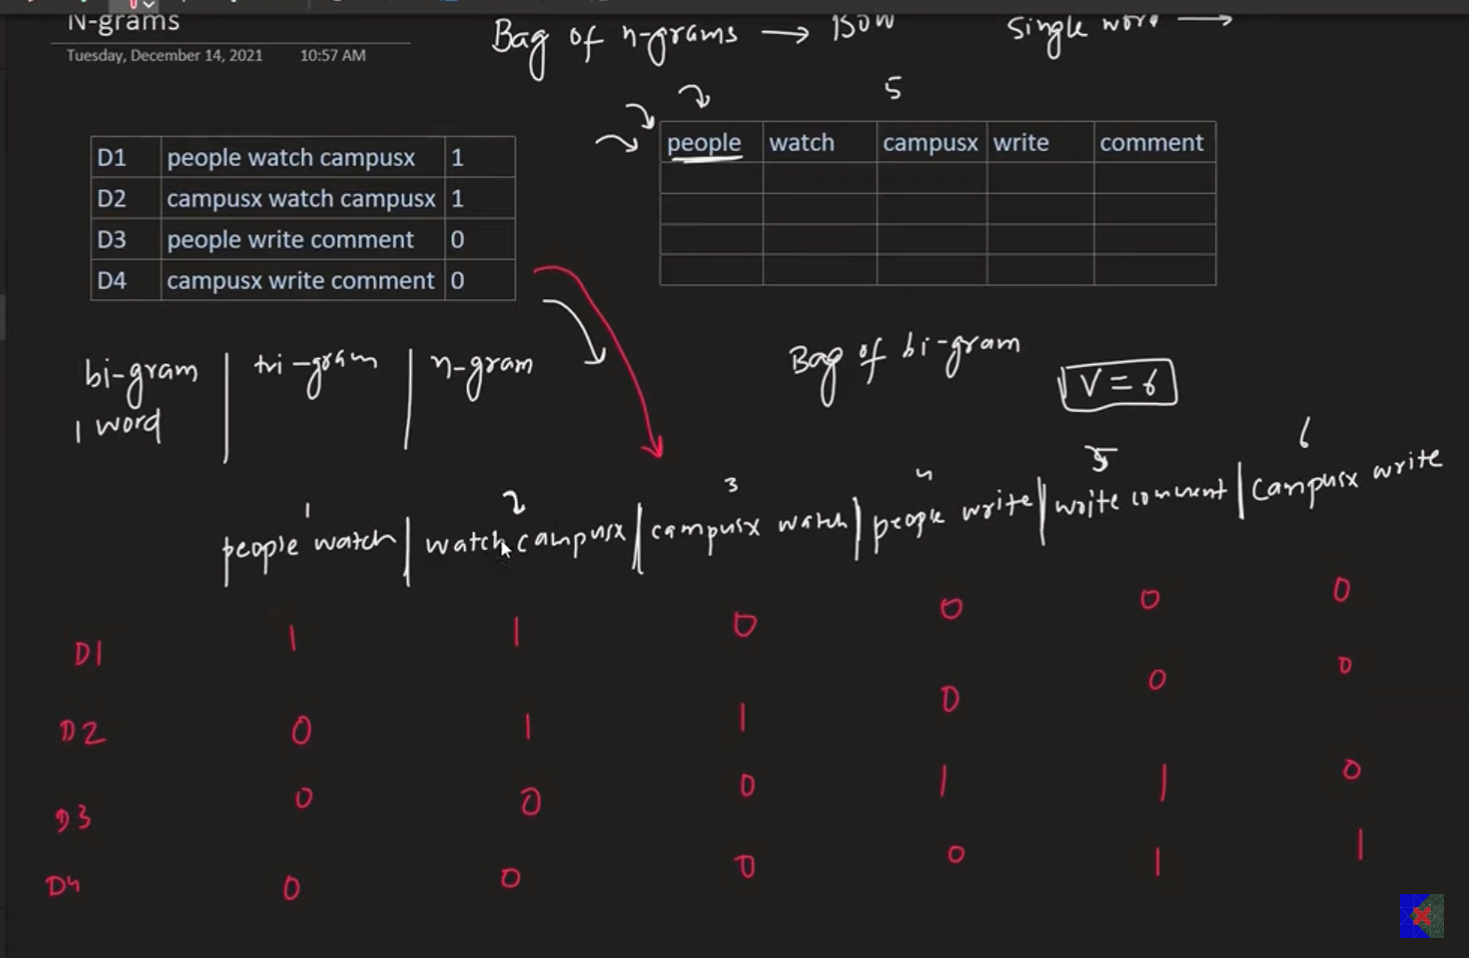

#Why it is better than Bag-of-words

Lets us take this statement and find its similarity using both method:

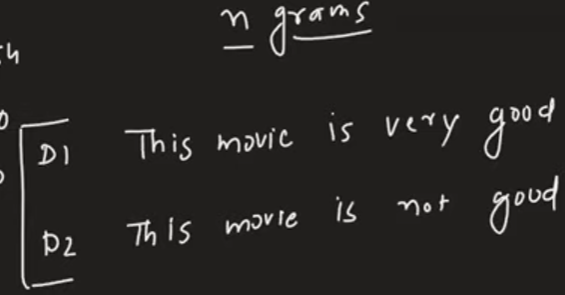


**Bag-of-words output**

Here every col is similar except two col so the distance between is less so bag words is considereing these statment as same

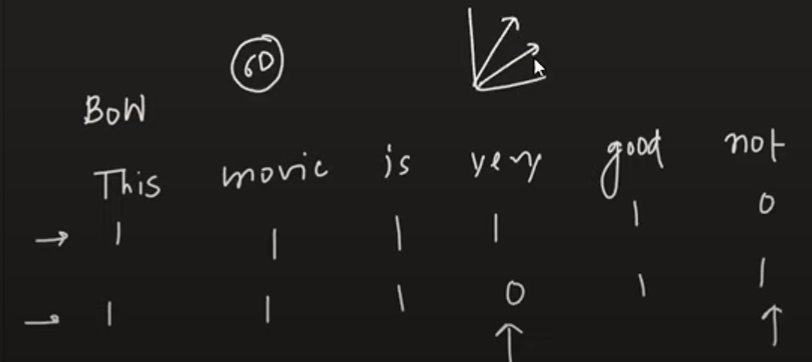

Ngrams taking two words as pair and working

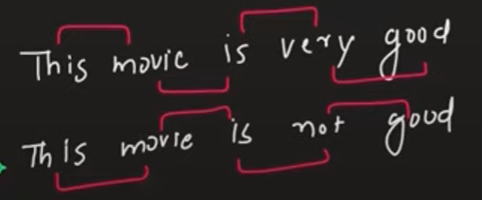

4 Col has different values so distance between them will be Far

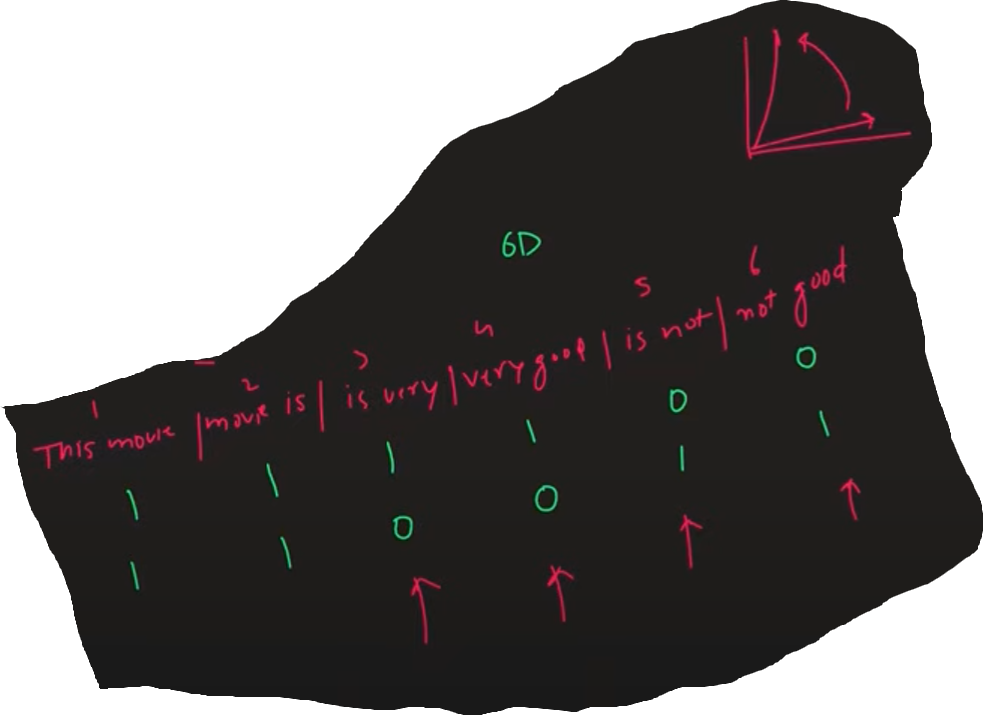

In [ ]:
# coding Ngrams

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = {
    'text': ['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write comment'],
    'output': [1,1,0,0]
}
df = pd.DataFrame(data)
df.head()

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

In [ ]:
bow = cv.fit_transform(df['text'])

In [ ]:
print(cv.vocabulary_)

{'people watch': 2, 'watch campusx': 4, 'campusx watch': 0, 'people write': 3, 'write comment': 5, 'campusx write': 1}


# Tf-Idf

**tf : Term-Frequency ||  Idf : Inverse Document Frequency**

- It assign a weight value for the words it occurs
- Weights are assigned based on
  - A word occuring more time in one document and less occuring in other document then that word will be assigned higher weight



. It’s a more advanced version of the Bag of Words (BoW) model, used to transform text into numerical data for machine learning. Unlike BoW, TF-IDF not only counts how many times a word appears but also measures how important a word is in a document compared to the entire set of documents.



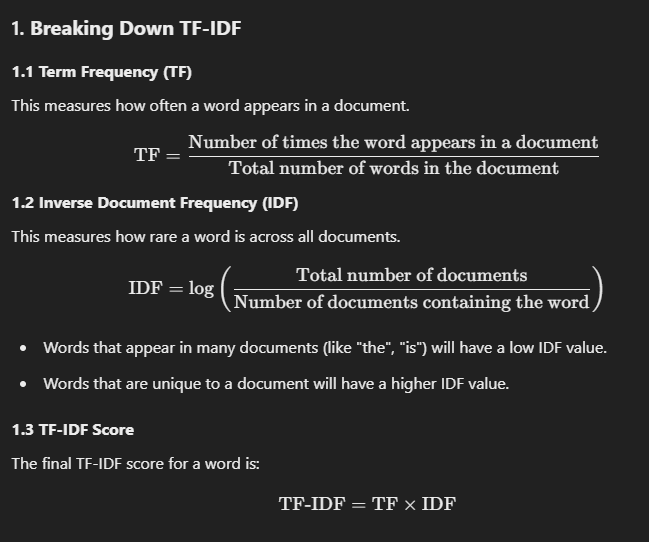

In [ ]:
import pandas as pd
# DataFrame
data = {
    'text': ['people watch campusx', 'campusx watch campusx', 'people write comment', 'campusx write comment'],
    'output': [1,1,0,0]
}
df = pd.DataFrame(data)
df.head()

,text,output
0,people watch campusx,1
1,campusx watch campusx,1
2,people write comment,0
3,campusx write comment,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(df['text']).toarray()

array([[0.49681612, 0.        , 0.61366674, 0.61366674, 0.        ],
       [0.8508161 , 0.        , 0.        , 0.52546357, 0.        ],
       [0.        , 0.57735027, 0.57735027, 0.        , 0.57735027],
       [0.49681612, 0.61366674, 0.        , 0.        , 0.61366674]])